In [ ]:
import kagglehub
kmader_skin_cancer_mnist_ham10000_path = kagglehub.dataset_download('kmader/skin-cancer-mnist-ham10000')

print('Data source import complete.')


Data source import complete.


## 1. Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
from pathlib import Path
import math

## 2. Exploratory Data Analysis

### 2.1 Load Metadata

In [ ]:
metadata = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


### 2.2 Basic Info

In [ ]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
metadata.nunique()

,0
lesion_id,7470
image_id,10015
dx,7
dx_type,4
age,18
sex,3
localization,15


In [ ]:
# Check null values
metadata.isnull().sum()

,0
lesion_id,0
image_id,0
dx,0
dx_type,0
age,57
sex,0
localization,0


### 2.3 Diagnosis Class Distribution

In [ ]:
# Class distribution
metadata.value_counts('dx')

,count
dx,
nv,6705
mel,1113
bkl,1099
bcc,514
akiec,327
vasc,142
df,115


In [ ]:
# Map short labels to full names
dx_full_names = {
    "nv":    "Melanocytic nevi",
    "mel":   "Melanoma",
    "bkl":   "Benign keratosis-like lesions",
    "bcc":   "Basal cell carcinoma",
    "akiec": "Actinic keratoses",
    "vasc":  "Vascular lesions",
    "df":    "Dermatofibroma"
}

metadata['dx_full_names'] = metadata['dx'].map(dx_full_names)
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dx_full_names
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions


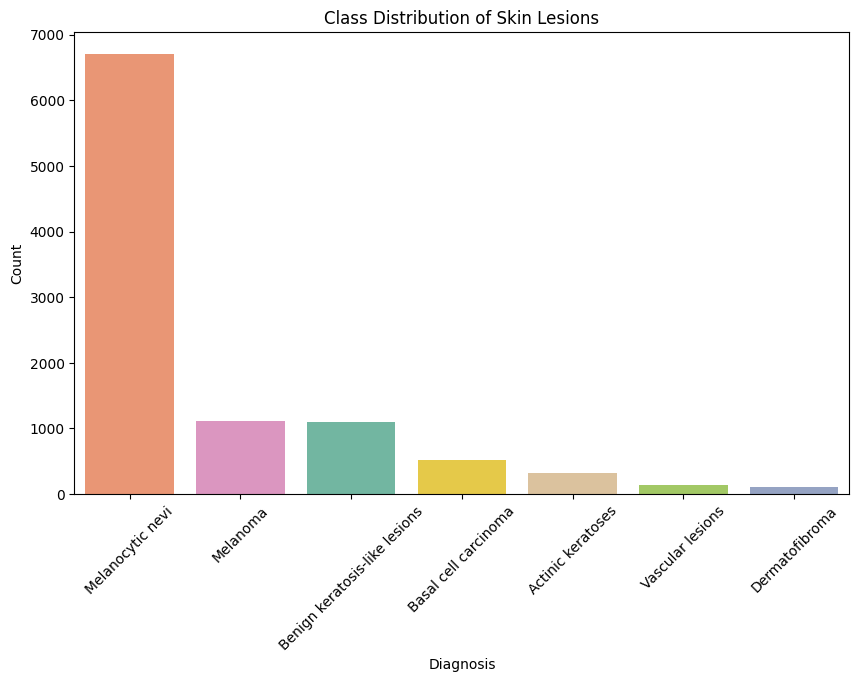

In [ ]:
# Plot class distribution
plt.figure(figsize=(10,6))
sns.countplot(data=metadata, x='dx_full_names', hue='dx_full_names', order=metadata['dx_full_names'].value_counts().index, palette='Set2', legend=False)
plt.title('Class Distribution of Skin Lesions')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 2.4 Age Distribution

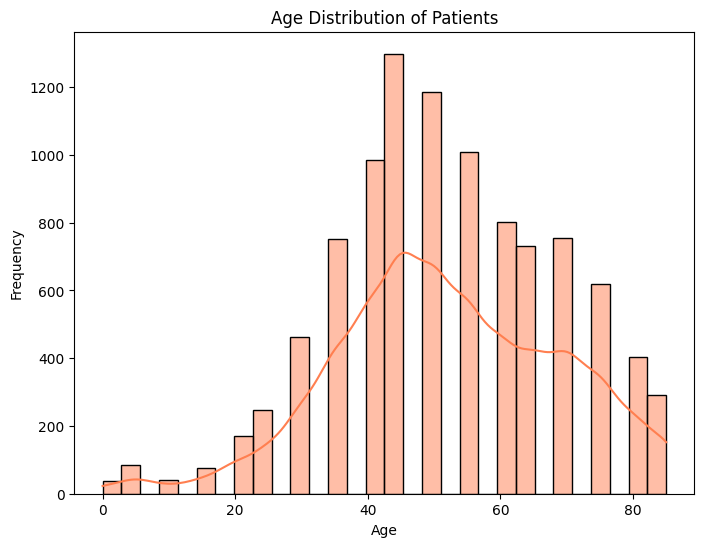

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(metadata['age'].dropna(), kde=True, bins=30, color='coral')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 2.5 Sex distribution

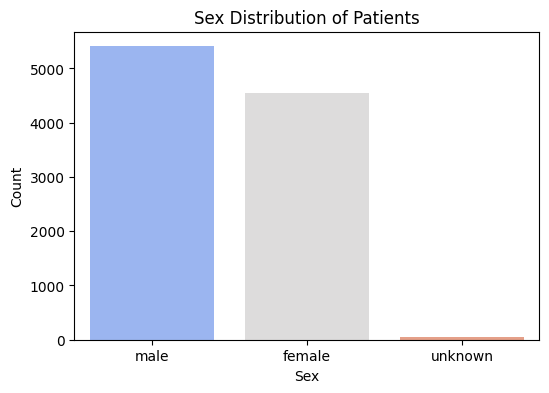

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=metadata, x='sex', hue='sex', palette='coolwarm', legend=False)
plt.title('Sex Distribution of Patients')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### 2.6  Body part distribution

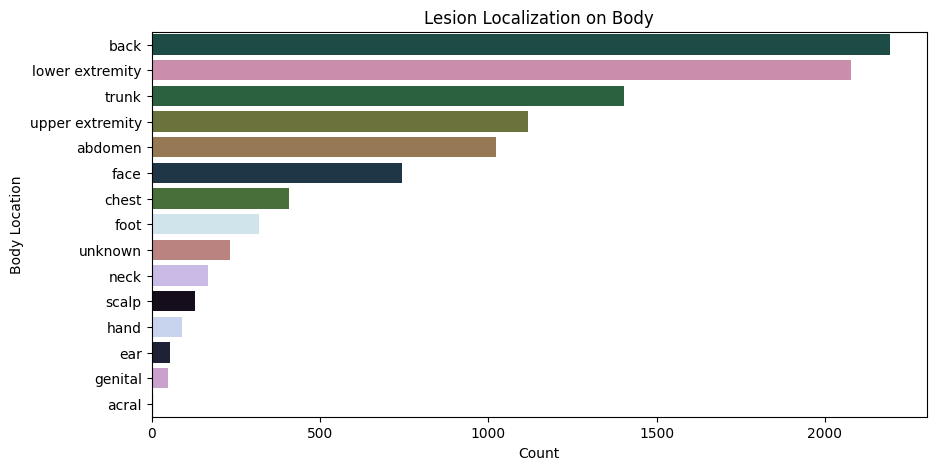

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=metadata, y='localization', hue='localization', order=metadata['localization'].value_counts().index, palette='cubehelix', legend=False)
plt.title('Lesion Localization on Body')
plt.xlabel('Count')
plt.ylabel('Body Location')
plt.show()

### 2.7  Sample images from each class

In [ ]:
image_dirs = [
    Path('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'),
    Path('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2')
]

In [ ]:
def get_image_path(image_id):
    for dir_path in image_dirs:
        img_path = dir_path / f"{image_id}.jpg"
        if img_path.exists():
            return img_path
    return None


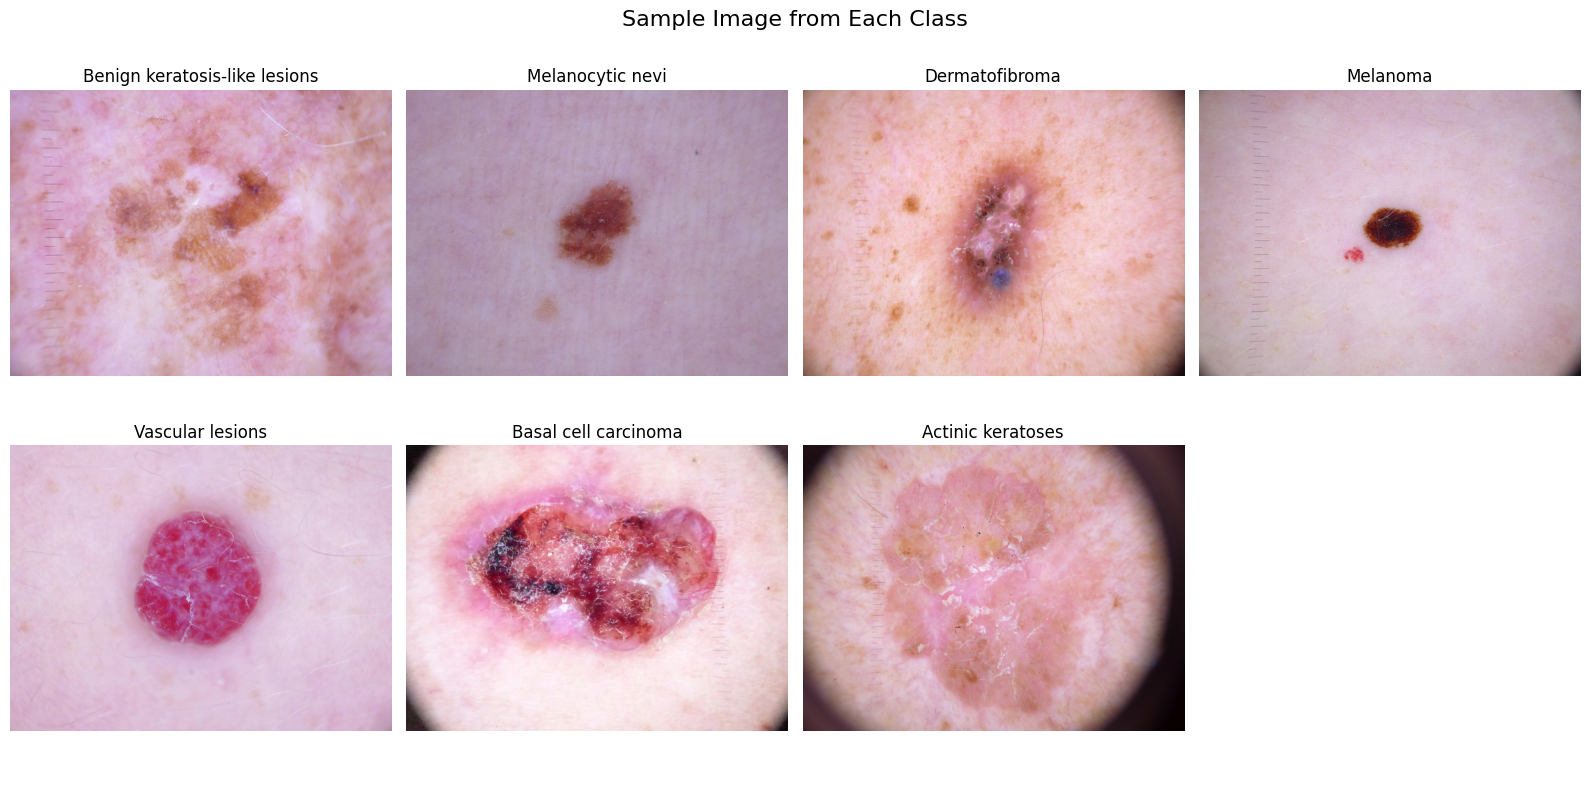

In [ ]:
# Plot one image per class
num_classes = metadata['dx'].nunique()
cols = 4
rows = math.ceil(num_classes / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, dx_code in enumerate(metadata['dx'].unique()):
    image_id = metadata.loc[metadata['dx'] == dx_code, 'image_id'].values[0]
    img_path = get_image_path(image_id)
    if img_path:
        image = imread(img_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(dx_full_names[dx_code])

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.suptitle("Sample Image from Each Class", fontsize=16)
plt.tight_layout()
plt.show()